In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
dataset = df.drop(columns=['day','month','year'])

In [4]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [6]:
dataset.shape

(243, 12)

In [7]:
dataset["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Remove the white space from Classes column
dataset["Classes"] = dataset["Classes"].str.strip()

In [9]:
dataset["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
## Encode the Classes,  not fire ---> 0   fire ----> 1
dataset["Classes"] = np.where(dataset["Classes"]=='not fire',0,1)

In [11]:
dataset["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
dataset.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [13]:
## Independent and Dependent Feature
X = dataset.drop("FWI",axis=1)
y = dataset["FWI"]

In [14]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape, y_train.shape

((194, 11), (194,))

In [19]:
X_test.shape, y_test.shape

((49, 11), (49,))

In [20]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


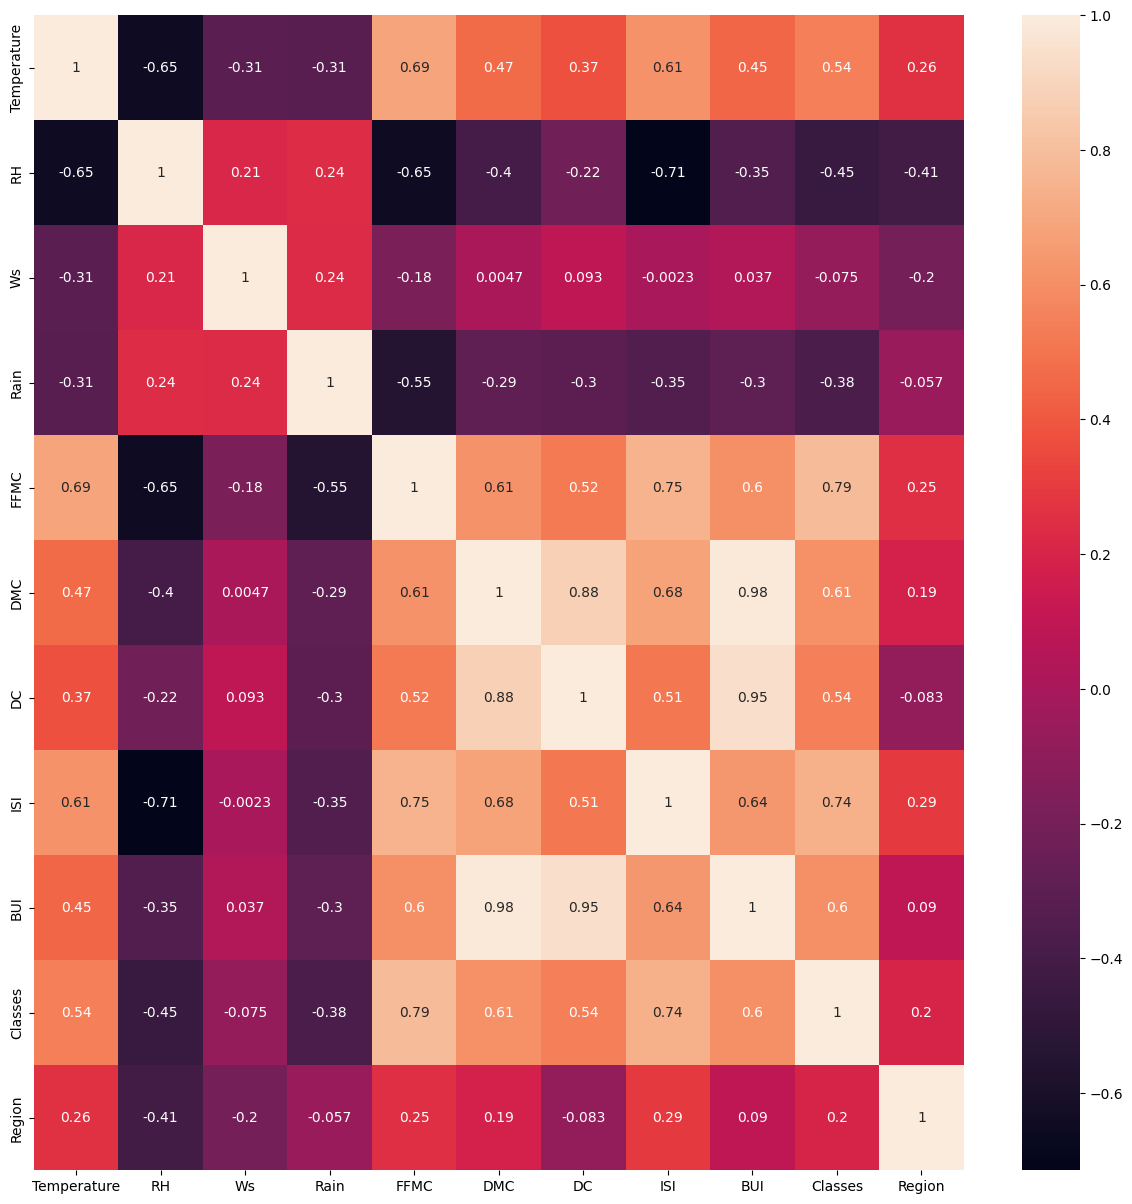

In [21]:
## Check for multicollinearity
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X_train, 0.85)

In [24]:
corr_features

{'BUI', 'DC'}

In [25]:
## Drop this correlation features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [26]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

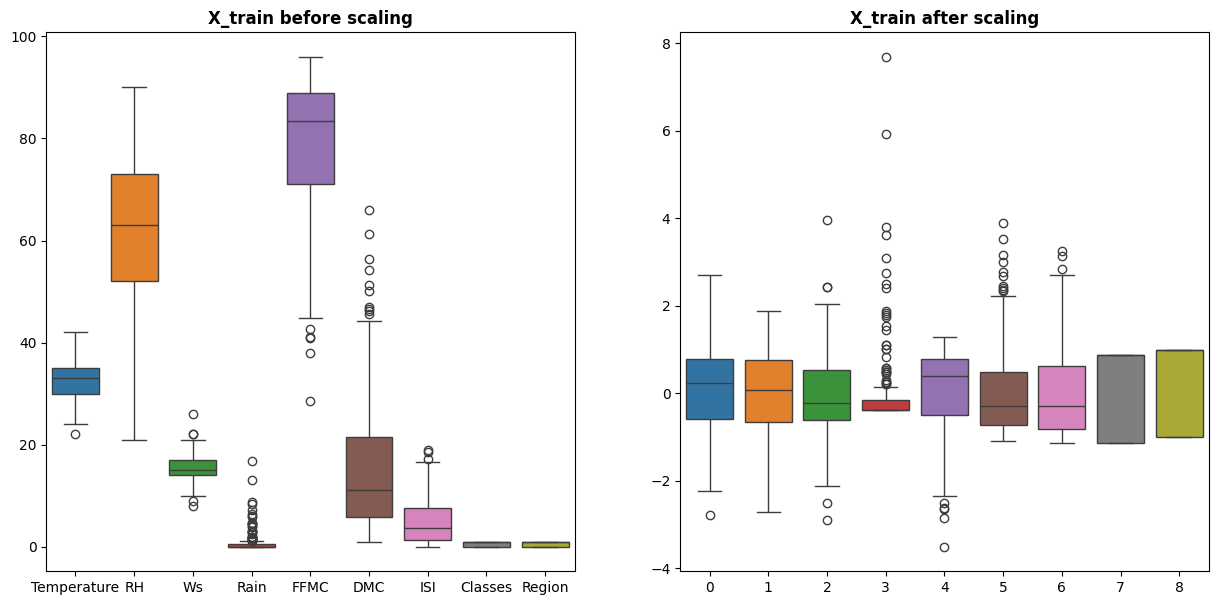

In [28]:
## Box Plots To Understand Effect Of Standard Scaler
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("X_train before scaling",weight='bold')
sns.boxplot(data = X_train)
plt.subplot(1,2,2)
plt.title("X_train after scaling",weight='bold')
sns.boxplot(data = X_train_scaled)
plt.show()

## Linear Regression Model

Mean Absolute Error: 0.5049978694165663
R2_Score: 0.9805895859259883


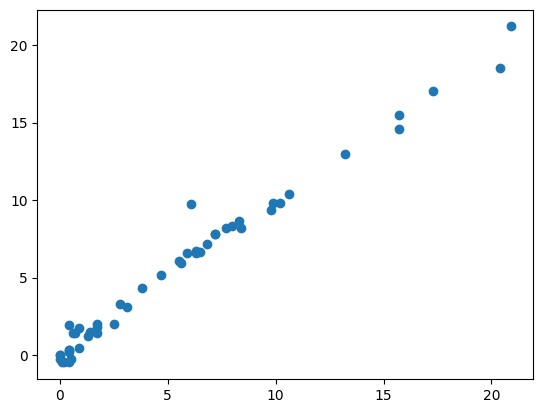

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)
y_prd = regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## Lasso Model

Mean Absolute Error: 1.0093958923873407
R2_Score: 0.9430507350726562


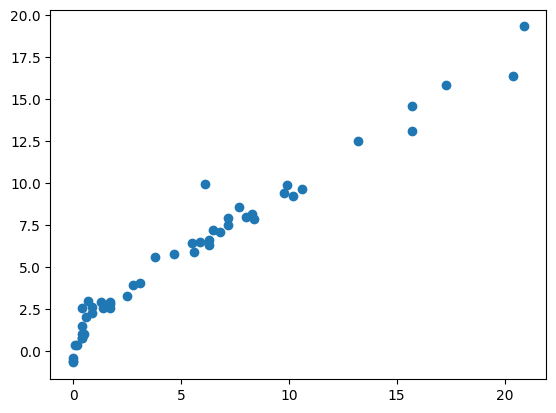

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_prd = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## Lasso Cross Validation or LassoCV

Mean Absolute Error: 0.5556715031617872
R2_Score: 0.978328234520343


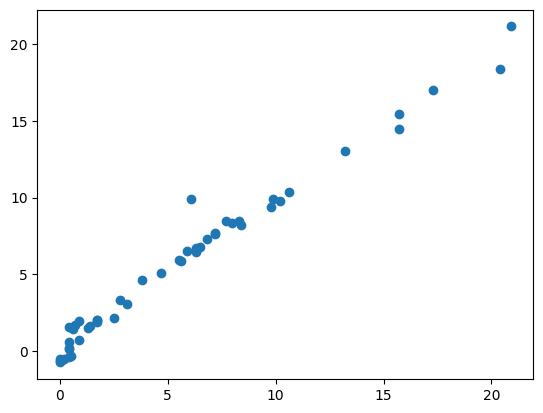

In [32]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_prd = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## Ridge Model

Mean Absolute Error: 0.5192048325844728
R2_Score: 0.9801058063273602


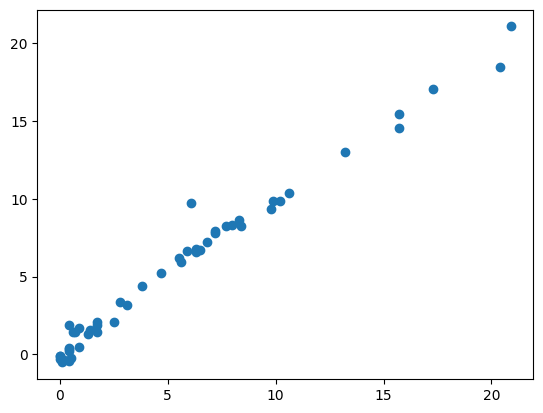

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_prd = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## RidgeCV

Mean Absolute Error: 0.68692620082771
R2_Score: 0.9722193780965628


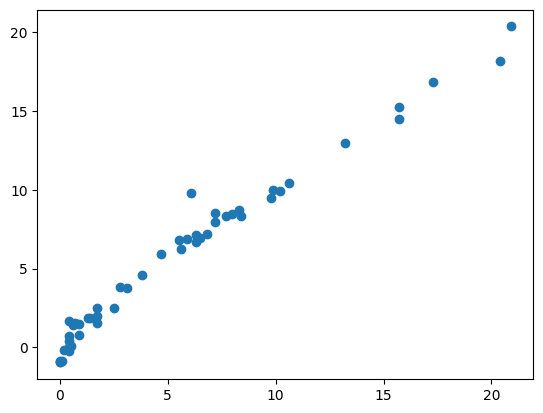

In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_prd = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## ElasticNet 

Mean Absolute Error: 1.6834416340136709
R2_Score: 0.8676961352267807


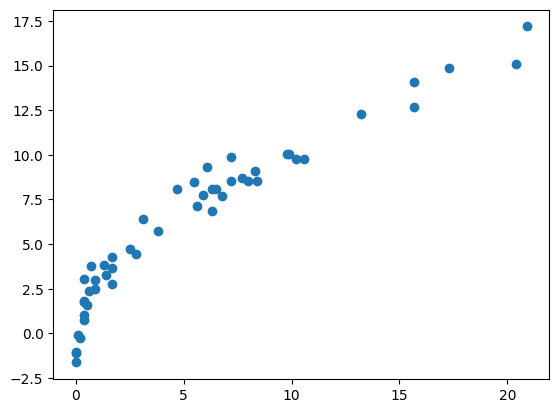

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_prd = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## ElasticNetCV

Mean Absolute Error: 0.5710147088777218
R2_Score: 0.9781014571778188


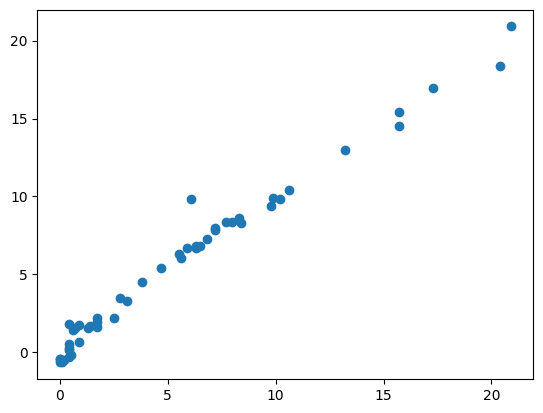

In [36]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_prd = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_prd)
score = r2_score(y_test,y_prd)
print("Mean Absolute Error:",mae)
print("R2_Score:",score)
plt.scatter(y_test,y_prd)
plt.show()

## Prediction for New Data

In [43]:
X_test_scaled.shape

(49, 9)

In [45]:
## Transformation of new data
test_data = scaler.transform([[34,13,45,0.3,2.5,4.6,5.6,1,0]])

C:\Users\Koushik Manna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
## Predict
regression.predict(test_data)


array([10.66877096])

## Pickle the machine learning models, preprocessing model standardscaler

In [47]:
scaler

StandardScaler()

In [48]:
regression

LinearRegression()

In [50]:
import pickle

In [51]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regression.pkl','wb'))

In [52]:
pickled_model = pickle.load(open('regression.pkl','rb'))

In [53]:
pickled_model.predict(test_data)

array([10.66877096])